In [1]:
import pandas as pd
import numpy as np
from scipy.stats import  norm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
from statsmodels.stats.weightstats import ztest

In [2]:
dataset = pd.read_csv('dados.csv')

In [3]:
dataset.head(3)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444


#### <font color = C4052A/>PROBLEMA </font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

In [4]:
# substituindo os valores correspondentes aos respectivos estados
estados_dict = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas',14: 'Roraima', 15: 'Pará',16: 'Amapá', 17: 'Tocantins',21: 'Maranhão',22: 'Piauí',23: 'Ceará',
    24: 'Rio Grande do Norte',25: 'Paraíba', 26: 'Pernambuco',27: 'Alagoas', 28: 'Sergipe',   29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo',
    33: 'Rio de Janeiro',35: 'São Paulo',41: 'Paraná',42: 'Santa Catarina',43: 'Rio Grande do Sul',50: 'Mato Grosso do Sul',51: 'Mato Grosso',
    52: 'Goiás',53: 'Distrito Federal'
}
dataset['UF'].replace(estados_dict, inplace = True)

In [5]:
# separando as amostras
sp = dataset.query("UF == 'São Paulo'").sample(n = 500, random_state = 101).Renda
rj = dataset.query("UF == 'Rio de Janeiro'").sample(n = 500, random_state = 101).Renda

In [6]:
# definindo valores de significância e confiância
significancia = 0.05
confianca = 1 - significancia

#### zTeste comparativo com  DescrStatsW  e  CompareMeans

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html

In [7]:
test_sp = DescrStatsW(sp)
test_rj = DescrStatsW(rj)

In [8]:
# testando a hipótise nula (H0) que o rendimento do rio é maior que o rendimento que o rendimento de são paulo 
test_A = test_rj.get_compare(test_sp)

In [9]:
z, p_valor = test_A.ztest_ind(alternative='smaller', value=0)
print('Estatística z ->', z)
print('p-valor ->', p_valor)

Estatística z -> -2.255318273608558
p-valor -> 0.012056679215693396


In [10]:
# test b com compareMeans
test_B = CompareMeans(test_rj, test_sp)

In [11]:
z, p_valor = test_B.ztest_ind(alternative='smaller', value=0)
print('Estatística z ->', z)
print('p-valor ->', p_valor)

Estatística z -> -2.255318273608558
p-valor -> 0.012056679215693396


In [12]:
p_valor <= significancia

True

### <font color = 00bff/>Conclusão Teste 1</font>
#### Considerando que o p_valor é <= que a  significância, nosso primeiro teste nos permite afirmar com um nível de 95% de confiança que  a hipótese nula (H0) pode ser rejeitada, ou seja, o rendimento do Rio de janeiro não é maior que o Rendimendo de são Paulo

---

**USANDO A FÓRMULA** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [13]:
# criando os parâmetros da equação com base nas informações do problema
sp_mean = sp.mean() # média
sp_std = sp.std() # desvio padrão
rj_mean = rj.mean() # média
rj_std = rj.std() # desvio padrão 

In [14]:
probabilidade = confianca
n_rj = 500 # n de amostras
n_sp = 500
D_0 = 0 # diferênça esperada entre as médias, a diferença observada permite fazer o cálculo comparativo

In [15]:
# valor crítico de z
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

1.64

In [16]:
# equação
numerador = (rj_mean - sp_mean) - D_0
denominador = np.sqrt((rj_std ** 2 / n_rj) + (sp_std ** 2 / n_sp))
z = numerador / denominador
z

-2.255318273608558

In [17]:
z <= z_alpha

True

### <font color = 00bff/>Conclusão Teste 2</font>
#### Considerando que o z é <= a z_alpha, nosso segundo teste também nos permite afirmar com um nível de 95% de confiança que a hipótese nula (H0) pode ser rejeitada, ou seja, o rendimento do Rio de janeiro não é maior que o Rendimendo de são Paulo

---

##  <font color =C4052A />Gráfico de distribuição das médias de Renda até 40k das amostras</font>

In [19]:
plot_sp = sp[sp < 40000]
plot_rj = rj[rj < 40000]

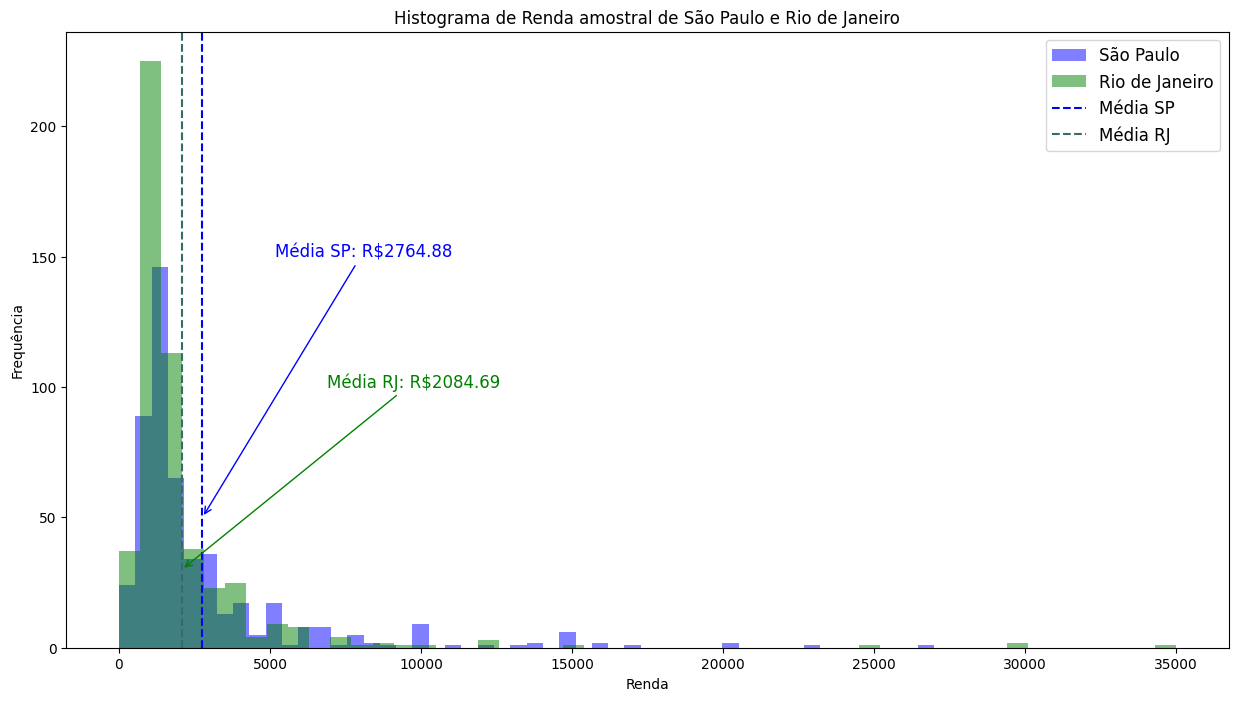

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

plt.hist(plot_sp, bins=50, alpha=0.5, color='blue', label='São Paulo')
plt.hist(plot_rj, bins=50, alpha=0.5, color='green', label='Rio de Janeiro')
plt.axvline(plot_sp.mean(), color='blue', linestyle='--', label='Média SP')
plt.axvline(plot_rj.mean(), color= '#356B68', linestyle='--', label='Média RJ')

# Personalização do gráfico
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.title('Histograma de Renda amostral de São Paulo e Rio de Janeiro')
plt.legend(fontsize = 12)

plt.annotate(f'Média SP: R${plot_sp.mean():.2f}', xy=(plot_sp.mean(), 50), xytext=(plot_sp.mean() + 2400, 150), color='blue', fontsize=12,
             arrowprops=dict(arrowstyle='->', color='blue'))
plt.annotate(f'Média RJ: R${plot_rj.mean():.2f}', xy=(plot_rj.mean(), 30), xytext=(plot_rj.mean() + 4800, 100), color='green', fontsize=12,
             arrowprops=dict(arrowstyle='->', color='green'))
plt.show()